In [1]:
from IPython.display import display, Image, clear_output

# Comprehensive Lipidome Automation Workflow (CLAW)

Welcome to CLAW, a tool designed to facilitate and optimize the processing of lipidomic MRM data. This Jupyter notebook encapsulates a suite of tools that streamline the various stages of lipidomics data analysis.

Our toolset enables users to efficiently process MRM data files in the mzML format. Upload a file and CLAW will parse the data into a structured Pandas dataframe. This dataframe includes critical information like sample_ID, MRM transition, and signal intensity. Furthermore, our tool aligns each MRM transition with a default or custom lipid_database for accurate and swift annotation.

Moreover, CLAW is equipped with an OzESI option, a tool to elucidate the double bond location in lipid isomers. This feature allows users to input OzESI data and pinpoint the precise location of double bonds in isomeric lipids. Users have the flexibility to select which double bond locations they want to analyze. Following this, CLAW autonomously predicts potential m/z values and cross-references these predictions with sample data, ensuring a comprehensive and meticulous analysis.

With automation at its core, CLAW eliminates the need for manual data processing, significantly reducing time expenditure. It is a robust and invaluable tool for handling large volumes of lipid MRM data, accelerating scientific discovery in the field of lipidomics.

In [2]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json

#Import all the necessary CLAW libraries
import create_directory
import CLAW

import warnings

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Directory and File Management
For structured data management and efficient workflow, the system first ensures the presence of an output directory. If such a directory already exists you can skip this step.

In [3]:
# # Create the output directory. If it already exists you can skip this step.
# create_directory.create_project_folder()


The name of the project is defined next. This is important as the created directory will bear this name, allowing users to manage and identify their data with ease.

After the mzML files are uploaded to the designated mzML folder, the next block of code segregates these files based on their characteristics. More specifically, it filters the files and transfers them to respective folders named 'o3on' and 'o2only'.

In [4]:
name_of_project = 'FaceFats'
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

One or both of the destination directories 'Projects/FaceFats/o3on' and 'Projects/FaceFats/o2only' do not exist.


## Pre-Parsing Setup
The following block of code takes the preset variable values and uses them to parse the mzML files. The parsed data, including the sample ID, MRM transitions, and intensities, is stored in a pandas dataframe for easy manipulation and analysis.

The function CLAW.parsing_mzml_to_df takes several arguments. data_base_name_location is the location of the lipid database that contains information on lipid classes, fatty acid chains, and their corresponding MRM transitions. Project_Folder_data is the location of the mzML files for the samples to be analyzed. tolerance defines the acceptable range of deviation for the MRM transitions when matching them with the lipid database. The argument remove_std is a boolean that, when True, indicates to remove the MRM transitions that correspond to standards (internal or external) present in the samples.

The function outputs a pandas dataframe (df) where each row corresponds to an MRM transition detected in a sample, and columns include the sample ID, MRM transition, and intensity of the transition, among other values.

In [5]:
# Set default values
data_base_name_location = 'lipid_database/Lipid_Database.xlsx'
Project = './Projects/'
Project_Name = 'FaceFats'
Project_Folder_data = Project + Project_Name + '/mzml_oz/'
Project_results = Project + Project_Name + '/results/'
file_name_to_save = 'FaceFats'
tolerance = 0.3
remove_std = True
save_data = True

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/Lipid_Database.xlsx
Project: ./Projects/
Project_Name: FaceFats
Project_Folder_data: ./Projects/FaceFats/mzml_oz/
Project_results: ./Projects/FaceFats/results/
file_name_to_save: FaceFats
tolerance: 0.3
remove_std: True
save_data: True


Define the master dataframes where the data will be stored during the parsing step.

In [6]:
time_and_intensity_df, master_df, OzESI_time_df = CLAW.create_analysis_dataframes()

## CLAW.full_parse()
In this code, the `CLAW.full_parse()` function is used to analyze the MRM data. It takes several parameters like the location of the lipid database, paths to the data and results folders, the name of the result files, and the tolerance for MRM transitions matching. The function returns two dataframes: `df_matched` that contains information about each detected lipid species and their corresponding MRM transitions, and `OzESI_time_df` which captures data related to OzESI-MS scans, including potential double bond locations of lipids. If `remove_std` is `True`, it removes MRM transitions related to standards from the dataframe, and if `save_data` is `True`, the dataframe is saved as a .csv file in the specified results folder.

In [7]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_DOD94_F3_WT_cereb_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_DOD94_F3_WT_cortex_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_DOD94_F3_WT_dienc_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_DOD94_F3_WT_hippo_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_FAD184_F3_WT_cereb_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_FAD184_F3_WT_cortex_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_FAD184_F3_WT_dienc_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_FAD184_F3_WT_hippo_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_FAD184_F4_WT_cereb_O3off_01.mzML

Finished parsing mzML file: ./Projects/FaceFats/mzml_oz/11282023_FAD184_F4_WT_cortex_O3off_01.mzML

Finished pa

In [8]:
df_MRM.head(None)

,Class,Intensity,Lipid,Parent_Ion,Product_Ion,Sample_ID,Transition
0,NaN,23881.841637,NaN,584.4,437.3,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
1,NaN,23570.421612,NaN,612.4,437.3,11282023_DOD94_F3_WT_cereb_O3off_01,612.4 -> 437.3
2,NaN,24330.961636,NaN,622.5,503.4,11282023_DOD94_F3_WT_cereb_O3off_01,622.5 -> 503.4
3,NaN,24203.941673,NaN,624.5,505.4,11282023_DOD94_F3_WT_cereb_O3off_01,624.5 -> 505.4
4,NaN,23612.401615,NaN,626.5,437.3,11282023_DOD94_F3_WT_cereb_O3off_01,626.5 -> 437.3
...,...,...,...,...,...,...,...
7345,TAG,328699.824772,"[TG(57:9),TG(56:2)]_FA18:1",932.9,633.6,12012023_FAD173_M1_5xFAD_liver_O3off_01,932.9 -> 633.6
7346,TAG,134490.908905,"[TG(58:7),TG(57:0)]_FA18:1",950.9,651.6,12012023_FAD173_M1_5xFAD_liver_O3off_01,950.9 -> 651.6
7347,TAG,60898.083759,"[TG(59:13),TG(58:6)]_FA18:1",952.8,653.5,12012023_FAD173_M1_5xFAD_liver_O3off_01,952.8 -> 653.5
7348,TAG,59683.304180,"[TG(59:12),TG(58:5)]_FA18:1",954.8,655.5,12012023_FAD173_M1_5xFAD_liver_O3off_01,954.8 -> 655.5


In [9]:
df_OzESI.head(None)
# df_OzESI.to_csv('FF_OzOFF_full.csv')
# df_OzESI.to_excel('FaceFatsOzdf.xlsx')

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,NaN,584.4,437.3,0.044183,41.860004,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
1,NaN,584.4,437.3,0.088567,41.740002,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
2,NaN,584.4,437.3,0.132967,42.000004,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
3,NaN,584.4,437.3,0.177367,41.800003,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
4,NaN,584.4,437.3,0.221783,41.760002,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
...,...,...,...,...,...,...,...
4138001,NaN,956.9,657.6,24.779117,41.700005,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6
4138002,NaN,956.9,657.6,24.823517,41.940002,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6
4138003,NaN,956.9,657.6,24.867933,41.900002,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6
4138004,NaN,956.9,657.6,24.912333,41.960003,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6


The `read_mrm_list()` function is first invoked to read the MRM database from the specified file location and return it as a pandas DataFrame `mrm_database`. Subsequently, the `match_lipids_parser()` function is called to match the detected lipids from the `OzESI_time_df` DataFrame, obtained from the OzESI-MS scans, with the known lipids in the `mrm_database` based on the MRM transitions within the specified `tolerance`. The result is saved in the `df_oz_matched` DataFrame, which now contains matched lipid species from the OzESI-MS data.

In [10]:
d1 = df_OzESI.iloc[:,1:9]

import pandas as pd

# Assuming d1 is your DataFrame

# Define the retention time range as a tuple (lower_bound, upper_bound)
retention_time_range = (10, 25)  # Replace with your specific range values

# Filter the DataFrame to keep only rows where Retention_Time is within the specified range
filtered_d1 = d1[(d1['Retention_Time'] >= retention_time_range[0]) & (d1['Retention_Time'] <= retention_time_range[1])]

# Now, filtered_d1 contains only the rows from d1 where Retention_Time is within the specified range

filtered_d1

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
225,584.4,437.3,10.035700,41.820004,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
226,584.4,437.3,10.080100,41.960003,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
227,584.4,437.3,10.124517,42.000004,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
228,584.4,437.3,10.168917,41.920002,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
229,584.4,437.3,10.213317,42.020004,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
...,...,...,...,...,...,...
4138001,956.9,657.6,24.779117,41.700005,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6
4138002,956.9,657.6,24.823517,41.940002,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6
4138003,956.9,657.6,24.867933,41.900002,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6
4138004,956.9,657.6,24.912333,41.960003,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6


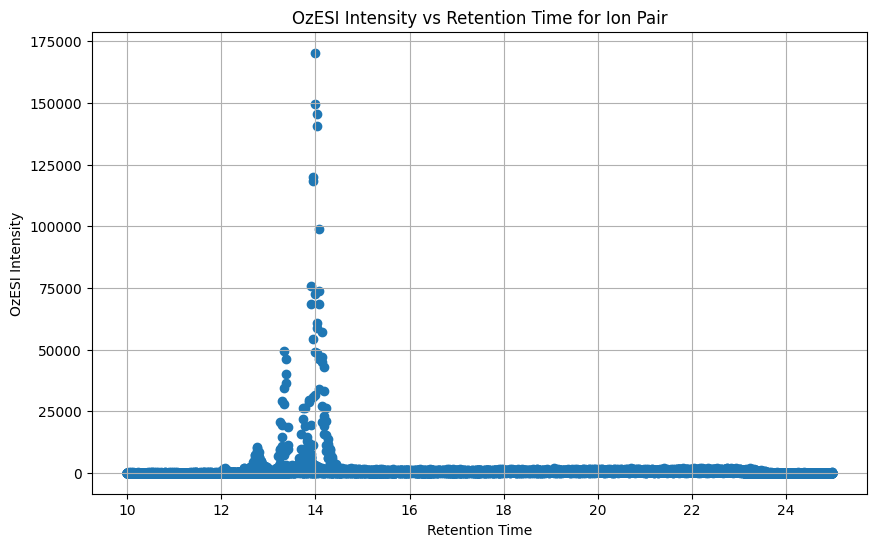

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
225,584.4,437.3,10.035700,41.820004,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
226,584.4,437.3,10.080100,41.960003,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
227,584.4,437.3,10.124517,42.000004,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
228,584.4,437.3,10.168917,41.920002,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
229,584.4,437.3,10.213317,42.020004,11282023_DOD94_F3_WT_cereb_O3off_01,584.4 -> 437.3
...,...,...,...,...,...,...
4138001,956.9,657.6,24.779117,41.700005,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6
4138002,956.9,657.6,24.823517,41.940002,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6
4138003,956.9,657.6,24.867933,41.900002,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6
4138004,956.9,657.6,24.912333,41.960003,12012023_FAD173_M1_5xFAD_liver_O3off_01,956.9 -> 657.6


In [11]:
import matplotlib.pyplot as plt

# # Filter the DataFrame for the specific ion pair
# specific_ion_data = filtered_d1[(filtered_d1['Parent_Ion'] == 866.8) & (filtered_d1['Product_Ion'] == 567.5)] # [TG(52:7),TG(51:0)]_FA18:1

# specific_ion_data = filtered_d1[(filtered_d1['Parent_Ion'] == 906.8) & (filtered_d1['Product_Ion'] == 607.5)] # [TG(55:8),TG(54:1)]_FA18:1
# specific_ion_data = filtered_d1[(filtered_d1['Parent_Ion'] == 904.8) & (filtered_d1['Product_Ion'] == 605.5)] # [TG(55:9)
specific_ion_data = filtered_d1[(filtered_d1['Parent_Ion'] == 846.8) & (filtered_d1['Product_Ion'] == 547.5)] # [TG(50:3)


# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(specific_ion_data['Retention_Time'], specific_ion_data['OzESI_Intensity'])
plt.title("OzESI Intensity vs Retention Time for Ion Pair")
plt.xlabel("Retention Time")
plt.ylabel("OzESI Intensity")
plt.grid(True)
plt.show()


filtered_d1



In [12]:
# from sklearn.mixture import GaussianMixture
# import pandas as pd

# # Assuming d1 is your DataFrame
# # Filter the DataFrame for the specific ion pair
# filtered_data = d1[(d1['Parent_Ion'] == 870.8) & (d1['Product_Ion'] == 599.5)] # [TG(52:5)]_FA16:1
# # filtered_data = d1[(d1['Parent_Ion'] == 846.8) & (d1['Product_Ion'] == 547.5)] # [TG(50:3)]_FA18:1
# # filtered_data = d1[(d1['Parent_Ion'] == 898.8) & (d1['Product_Ion'] == 599.5)] # [TG(54:5)]_FA18:1


# # Calculate 1% below the maximum 'OzESI_Intensity'
# max_intensity = filtered_data['OzESI_Intensity'].max()
# print(max_intensity)
# cutoff_intensity = max_intensity * 0.01
# print(cutoff_intensity)

# # # Filter the DataFrame based on this cutoff
# # filtered_data = filtered_data[filtered_data['OzESI_Intensity'] >= cutoff_intensity]
# # Filter the DataFrame based on the cutoff and also > 1000
# filtered_data = filtered_data[(filtered_data['OzESI_Intensity'] >= cutoff_intensity) & (filtered_data['OzESI_Intensity'] > 1000)]


# # Get unique Sample_IDs for this ion pair
# unique_sample_ids = filtered_data['Sample_ID'].unique()
# # unique_sample_ids = ['12012023_FAD173_M1_5xFAD_liver_O3off_01']

# # Initialize an empty DataFrame to store results
# clustered_data = pd.DataFrame()

# for sample_id in unique_sample_ids:
#     # Filter the data for each Sample_ID
#     sample_filtered_data = filtered_data[filtered_data['Sample_ID'] == sample_id]

#     # Reshape the 'Retention_Time' data for GMM
#     retention_times = sample_filtered_data['Retention_Time'].values.reshape(-1, 1)

#     # Check if there are enough samples for clustering
#     if len(retention_times) >= 3:
#         # Apply Gaussian Mixture Model clustering
#         gmm = GaussianMixture(n_components=3, random_state=0).fit(retention_times)

#         # Predict the cluster labels
#         labels = gmm.predict(retention_times)

#         # Add the cluster labels to the filtered data
#         sample_filtered_data['Cluster_Label'] = labels
#     else:
#         # Handle the case where there are too few samples for clustering
#         sample_filtered_data['Cluster_Label'] = 999 #  This is a dummy value, was "nothing enough data" before this

#     # Append the results to the clustered_data DataFrame
#     clustered_data = pd.concat([clustered_data, sample_filtered_data])

# # Print or analyze the combined clustered data
# clustered_data


DBSCAN
CLUSTER DATA

Individual sample cluster method

In [13]:
# from sklearn.cluster import DBSCAN
# import pandas as pd

# # Assuming d1 is your DataFrame
# # Filter the DataFrame for the specific ion pair
# # filtered_data = d1[(d1['Parent_Ion'] == 898.8) & (d1['Product_Ion'] == 599.5)]
# # filtered_data = filtered_d1[(filtered_d1['Parent_Ion'] == 866.8) & (filtered_d1['Product_Ion'] == 567.5)] # 52:7
# filtered_data = filtered_d1[(filtered_d1['Parent_Ion'] == 906.8) & (filtered_d1['Product_Ion'] == 607.5)] # 55:8

# # Calculate 1% below the maximum 'OzESI_Intensity'
# max_intensity = filtered_data['OzESI_Intensity'].max()
# cutoff_intensity = max_intensity * 0.005

# # Filter the DataFrame based on the cutoff and also > 1000
# filtered_data = filtered_data[(filtered_data['OzESI_Intensity'] >= cutoff_intensity) & (filtered_data['OzESI_Intensity'] > 1000)]

# # Get unique Sample_IDs for this ion pair
# unique_sample_ids = filtered_data['Sample_ID'].unique()

# # Initialize an empty DataFrame to store results
# clustered_data = pd.DataFrame()

# for sample_id in unique_sample_ids:
#     # Filter the data for each Sample_ID
#     sample_filtered_data = filtered_data[filtered_data['Sample_ID'] == sample_id]

#     # Reshape the 'Retention_Time' data for DBSCAN
#     retention_times = sample_filtered_data[['Retention_Time']].values


#     # Apply DBSCAN clustering
#     dbscan = DBSCAN(eps=0.5, min_samples=3).fit(retention_times)

#     # Get the cluster labels
#     labels = dbscan.labels_

#     # Add the cluster labels to the filtered data
#     sample_filtered_data['Cluster_Label'] = labels


#     # Append the results to the clustered_data DataFrame
#     clustered_data = pd.concat([clustered_data, sample_filtered_data])


# clustered_data


ALL SAMPLES clustering method

In [14]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Assuming filtered_d1 is your DataFrame

# # Filter the DataFrame for the specific ion pair
# filtered_data = filtered_d1[(filtered_d1['Parent_Ion'] == 906.8) & (filtered_d1['Product_Ion'] == 607.5)]  # 55:8
# Filter the DataFrame for the specific ion pair
# filtered_data = filtered_d1[(filtered_d1['Parent_Ion'] == 904.8) & (filtered_d1['Product_Ion'] == 605.5)]  # 55:9
# # Filter the DataFrame for the specific ion pair
# filtered_data = filtered_d1[(filtered_d1['Parent_Ion'] == 922.9) & (filtered_d1['Product_Ion'] == 651.6)]  # 56:6 16:1
# filtered_data = filtered_d1[(filtered_d1['Parent_Ion'] == 846.8) & (filtered_d1['Product_Ion'] == 547.5)]  # 50:3
filtered_data = filtered_d1[(filtered_d1['Parent_Ion'] ==870.8) & (filtered_d1['Product_Ion'] == 599.5)]  # 52:5
# Calculate 1% below the maximum 'OzESI_Intensity'
max_intensity = filtered_data['OzESI_Intensity'].max()
cutoff_intensity = max_intensity * 0.01

# Filter the DataFrame based on the cutoff and also > 500
filtered_data = filtered_data[(filtered_data['OzESI_Intensity'] >= cutoff_intensity) & (filtered_data['OzESI_Intensity'] > 2000)]

# Reshape the 'Retention_Time' data for DBSCAN
retention_times = filtered_data[['Retention_Time']].values

# Apply DBSCAN clustering to all samples
dbscan = DBSCAN(eps=0.1, min_samples=20).fit(retention_times)

# Get the cluster labels
labels = dbscan.labels_

# Add the cluster labels to the filtered data
filtered_data['Cluster_Label'] = labels

# The resulting DataFrame
clustered_data = filtered_data

# Display the DataFrame
clustered_data


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label
155093,870.8,599.5,11.997183,5606.080566,11282023_DOD94_F3_WT_cortex_O3off_01,870.8 -> 599.5,-1
155094,870.8,599.5,12.041583,4288.040527,11282023_DOD94_F3_WT_cortex_O3off_01,870.8 -> 599.5,-1
492889,870.8,599.5,11.952783,11345.300781,11282023_FAD184_F3_WT_cortex_O3off_01,870.8 -> 599.5,-1
492890,870.8,599.5,11.997183,51143.363281,11282023_FAD184_F3_WT_cortex_O3off_01,870.8 -> 599.5,-1
492891,870.8,599.5,12.041600,23879.921875,11282023_FAD184_F3_WT_cortex_O3off_01,870.8 -> 599.5,-1
...,...,...,...,...,...,...,...
4124224,870.8,599.5,13.018550,17453.560547,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0
4124225,870.8,599.5,13.062967,16671.220703,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0
4124226,870.8,599.5,13.107367,8296.840820,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0
4124227,870.8,599.5,13.151767,4621.920410,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0


Group data

In [15]:
#group cluster data by sample ID Parent and Product Ion
# grouped_cluster_data = clustered_data.groupby(['Sample_ID', 'Parent_Ion', 'Product_Ion'])
grouped_cluster_data = clustered_data.groupby(['Parent_Ion', 'Product_Ion'])
#add group number to each to a new column called Group
clustered_data['Group'] = grouped_cluster_data.ngroup()
clustered_data

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,Group
155093,870.8,599.5,11.997183,5606.080566,11282023_DOD94_F3_WT_cortex_O3off_01,870.8 -> 599.5,-1,0
155094,870.8,599.5,12.041583,4288.040527,11282023_DOD94_F3_WT_cortex_O3off_01,870.8 -> 599.5,-1,0
492889,870.8,599.5,11.952783,11345.300781,11282023_FAD184_F3_WT_cortex_O3off_01,870.8 -> 599.5,-1,0
492890,870.8,599.5,11.997183,51143.363281,11282023_FAD184_F3_WT_cortex_O3off_01,870.8 -> 599.5,-1,0
492891,870.8,599.5,12.041600,23879.921875,11282023_FAD184_F3_WT_cortex_O3off_01,870.8 -> 599.5,-1,0
...,...,...,...,...,...,...,...,...
4124224,870.8,599.5,13.018550,17453.560547,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0
4124225,870.8,599.5,13.062967,16671.220703,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0
4124226,870.8,599.5,13.107367,8296.840820,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0
4124227,870.8,599.5,13.151767,4621.920410,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0


Verify correct cluster

Find mean RT and max Intensity

In [62]:
# import pandas as pd

# # Assuming df is your original DataFrame
# grouped = clustered_data.groupby(['Group', 'Cluster_Label'])
# grouped2 = clustered_data.groupby(['Parent_Ion', 'Product_Ion'])

# # Calculating the average Retention_Time and maximum OzESI_Intensity
# aggregated_df = grouped.agg({
#     'Retention_Time': 'mean',
#     'OzESI_Intensity': 'max'
# }).reset_index()

# # Renaming the columns for clarity
# aggregated_df.rename(columns={
#     'Retention_Time': 'Average_Retention_Time',
#     'OzESI_Intensity': 'Max_OzESI_Intensity'
# }, inplace=True)

# # Merging with the original DataFrame to keep all columns
# # Using 'left' merge to keep all rows from the original DataFrame
# # and only add the aggregated values
# final_df = pd.merge(clustered_data.drop(columns=['Retention_Time', 'OzESI_Intensity']),
#                     aggregated_df, on=['Group', 'Cluster_Label'], how='left')

# # Now, final_df contains all original columns plus the new aggregated columns
# # Assuming final_df is your DataFrame from the previous step

# # Group by 'Group' and 'Cluster_Label' and keep the row with the maximum 'OzESI_Intensity'
# max_intensity_df = final_df.loc[final_df.groupby(['Group', 'Cluster_Label'])['Max_OzESI_Intensity'].idxmax()]

# # Now, max_intensity_df contains only the rows with the maximum 'OzESI_Intensity' for each Group and Cluster_Label pair
# # Filtering out rows where 'Cluster_Label' is -1
# filtered_df = max_intensity_df[max_intensity_df['Cluster_Label'] != -1]

mean RT max intensity

In [246]:
# import pandas as pd

# # Assuming clustered_data is your original DataFrame

# # Group by 'Group' and 'Cluster_Label' for OzESI_Intensity and calculate mean
# grouped = clustered_data.groupby(['Group', 'Cluster_Label'])
# mean_intensity_df = grouped['OzESI_Intensity'].mean().reset_index()
# mean_intensity_df.rename(columns={'OzESI_Intensity': 'Mean_OzESI_Intensity'}, inplace=True)

# # Merge the mean intensity values back into the original DataFrame
# merged_df = pd.merge(clustered_data, mean_intensity_df, on=['Group', 'Cluster_Label'], how='left')

# # Group by 'Parent_Ion' and 'Product_Ion' for Retention_Time and calculate average
# grouped2 = clustered_data.groupby(['Parent_Ion', 'Product_Ion'])
# average_retention_time_df = grouped2['Retention_Time'].mean().reset_index()
# average_retention_time_df.rename(columns={'Retention_Time': 'Average_Retention_Time'}, inplace=True)

# # Merge the average retention time values back into the merged DataFrame
# merged_df = pd.merge(merged_df, average_retention_time_df, on=['Parent_Ion', 'Product_Ion'], how='left')

# # Filtering out rows where 'Cluster_Label' is -1
# filtered_df = merged_df[merged_df['Cluster_Label'] != -1]

# filtered_df


Max Intensity Mean RT

In [20]:
import pandas as pd

# Assuming clustered_data is your original DataFrame

# Calculate the max OzESI_Intensity for each Group and Cluster_Label
# directly within the DataFrame
clustered_data['Max_OzESI_Intensity'] = clustered_data.groupby(['Group', 'Cluster_Label'])['OzESI_Intensity'].transform('max')

# Calculate the average Retention_Time for each Parent_Ion and Product_Ion
# directly within the DataFrame
clustered_data['Average_Retention_Time'] = clustered_data.groupby(['Parent_Ion', 'Product_Ion', 'Cluster_Label'])['Retention_Time'].transform('mean')

# Filtering out rows where 'Cluster_Label' is -1
filtered_df = clustered_data[clustered_data['Cluster_Label'] != -1]

filtered_df


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,Group,Max_OzESI_Intensity,Average_Retention_Time
2097432,870.8,599.5,12.441267,4200.000488,11302023_DOD94_F4_5xFAD_cereb_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
2773027,870.8,599.5,12.441217,38913.023438,11302023_FAD185_M3_5xFAD_cereb_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
2773028,870.8,599.5,12.485633,37382.164062,11302023_FAD185_M3_5xFAD_cereb_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
2773029,870.8,599.5,12.530033,22940.562500,11302023_FAD185_M3_5xFAD_cereb_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
2773030,870.8,599.5,12.574433,11812.720703,11302023_FAD185_M3_5xFAD_cereb_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
...,...,...,...,...,...,...,...,...,...,...
4124223,870.8,599.5,12.974150,27388.501953,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
4124224,870.8,599.5,13.018550,17453.560547,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
4124225,870.8,599.5,13.062967,16671.220703,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
4124226,870.8,599.5,13.107367,8296.840820,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082


Choose Cluster with correct RT

In [17]:
# # import pandas as pd

# # # Assuming filtered_df is your DataFrame

# # # Step 1: Identify the combination with the highest Max_OzESI_Intensity for each Group
# # group_max_intensity_combination = filtered_df.groupby('Group').apply(lambda x: x.loc[x['Max_OzESI_Intensity'].idxmax()])

# # # Step 2: Create a mapping from Group to Average_Retention_Time of the identified combination
# # group_to_correct_rt = group_max_intensity_combination.set_index('Group')['Average_Retention_Time'].to_dict()

# # # Step 3: Map the Correct_RT values to the original DataFrame
# # filtered_df['Correct_RT'] = filtered_df['Group'].map(group_to_correct_rt)

# # filtered_df
# import pandas as pd

# # Assuming filtered_df is your DataFrame

# # Step 1: Identify the combination with the highest Max_OzESI_Intensity for each Group
# group_max_intensity_combination = filtered_df.groupby('Group').apply(lambda x: x.loc[x['Max_OzESI_Intensity'].idxmax()])

# # Identify which Cluster_Label this belongs to
# group_to_cluster = group_max_intensity_combination.set_index('Group')['Cluster_Label'].to_dict()

# # Step 2: Drop other Cluster_Labels from the df for that specific group
# filtered_df = filtered_df[filtered_df.apply(lambda x: x['Cluster_Label'] == group_to_cluster[x['Group']], axis=1)]

# filtered_df


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,Group,Max_OzESI_Intensity,Average_Retention_Time
2097432,870.8,599.5,12.441267,4200.000488,11302023_DOD94_F4_5xFAD_cereb_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
2773027,870.8,599.5,12.441217,38913.023438,11302023_FAD185_M3_5xFAD_cereb_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
2773028,870.8,599.5,12.485633,37382.164062,11302023_FAD185_M3_5xFAD_cereb_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
2773029,870.8,599.5,12.530033,22940.562500,11302023_FAD185_M3_5xFAD_cereb_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
2773030,870.8,599.5,12.574433,11812.720703,11302023_FAD185_M3_5xFAD_cereb_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
...,...,...,...,...,...,...,...,...,...,...
4124223,870.8,599.5,12.974150,27388.501953,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
4124224,870.8,599.5,13.018550,17453.560547,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
4124225,870.8,599.5,13.062967,16671.220703,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
4124226,870.8,599.5,13.107367,8296.840820,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082


Filter max intensity for each 'Sample_ID', 'Group'

In [21]:
import pandas as pd

# Assuming your DataFrame is named df

# Group by 'Sample_ID' and 'Group', and find the row with the highest 'OzESI_Intensity' for each group
filtered_df2= filtered_df.groupby(['Sample_ID', 'Group']).apply(lambda x: x.loc[x['OzESI_Intensity'].idxmax()]).reset_index(drop=True)

filtered_df2


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,Group,Max_OzESI_Intensity,Average_Retention_Time
0,870.8,599.5,12.441267,4200.000488,11302023_DOD94_F4_5xFAD_cereb_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
1,870.8,599.5,12.441217,38913.023438,11302023_FAD185_M3_5xFAD_cereb_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
2,870.8,599.5,12.441233,44335.781250,11302023_FAD185_M3_5xFAD_dienc_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
3,870.8,599.5,12.530050,16103.840820,11302023_FAD189_M1_5xFAD_cereb_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
4,870.8,599.5,12.530033,19535.681641,11302023_FAD189_M1_5xFAD_cortex_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
5,870.8,599.5,12.752100,232373.718750,12012023_DOD73_M2_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
6,870.8,599.5,12.752083,383918.187500,12012023_FAD131_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
7,870.8,599.5,12.752083,358156.218750,12012023_FAD131_M2_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
8,870.8,599.5,12.796483,151846.875000,12012023_FAD131_M4_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082
9,870.8,599.5,12.752117,334043.312500,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082


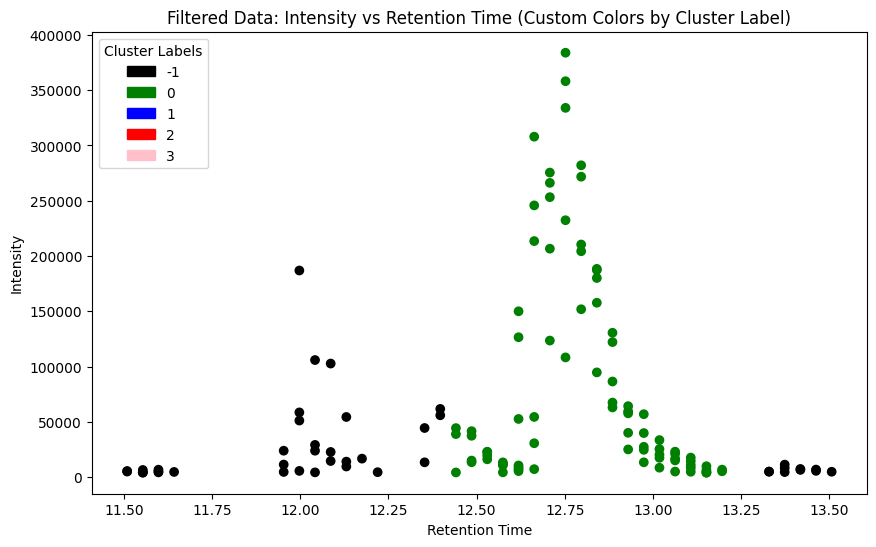

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define custom colors for the clusters
color_map = {-1: 'black', 0: 'green', 1: 'blue', 2: 'red',3:'pink'}
colors = clustered_data['Cluster_Label'].map(color_map)

# Plotting the Intensity vs Retention Time with custom colors
plt.figure(figsize=(10, 6))
plt.scatter(clustered_data['Retention_Time'], clustered_data['OzESI_Intensity'], c=colors)

# Adding labels and title to the plot
plt.xlabel('Retention Time')
plt.ylabel('Intensity')
plt.title('Filtered Data: Intensity vs Retention Time (Custom Colors by Cluster Label)')

# Creating a legend for the plot
legend_labels = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', -1: 'Cluster -1'}
patch_list = [mpatches.Patch(color=color, label=label) for label, color in color_map.items()]
plt.legend(handles=patch_list, loc='upper left', title='Cluster Labels')

# 52:5
# Displaying the plot
plt.show()

match lipids to this df

In [23]:
mrm_database = CLAW.read_mrm_list(data_base_name_location, deuterated=False)
matched_df = CLAW.match_lipids_parser(mrm_database, filtered_df2, tolerance=0.3)
matched_df

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Cluster_Label,Group,Max_OzESI_Intensity,Average_Retention_Time,Lipid,Class
0,870.8,599.5,12.441267,4200.000488,11302023_DOD94_F4_5xFAD_cereb_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082,[TG(52:5)]_FA16:1,TAG
1,870.8,599.5,12.441217,38913.023438,11302023_FAD185_M3_5xFAD_cereb_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082,[TG(52:5)]_FA16:1,TAG
2,870.8,599.5,12.441233,44335.781250,11302023_FAD185_M3_5xFAD_dienc_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082,[TG(52:5)]_FA16:1,TAG
3,870.8,599.5,12.530050,16103.840820,11302023_FAD189_M1_5xFAD_cereb_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082,[TG(52:5)]_FA16:1,TAG
4,870.8,599.5,12.530033,19535.681641,11302023_FAD189_M1_5xFAD_cortex_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082,[TG(52:5)]_FA16:1,TAG
5,870.8,599.5,12.752100,232373.718750,12012023_DOD73_M2_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082,[TG(52:5)]_FA16:1,TAG
6,870.8,599.5,12.752083,383918.187500,12012023_FAD131_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082,[TG(52:5)]_FA16:1,TAG
7,870.8,599.5,12.752083,358156.218750,12012023_FAD131_M2_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082,[TG(52:5)]_FA16:1,TAG
8,870.8,599.5,12.796483,151846.875000,12012023_FAD131_M4_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082,[TG(52:5)]_FA16:1,TAG
9,870.8,599.5,12.752117,334043.312500,12012023_FAD173_M1_5xFAD_liver_O3off_01,870.8 -> 599.5,0,0,383918.1875,12.815082,[TG(52:5)]_FA16:1,TAG


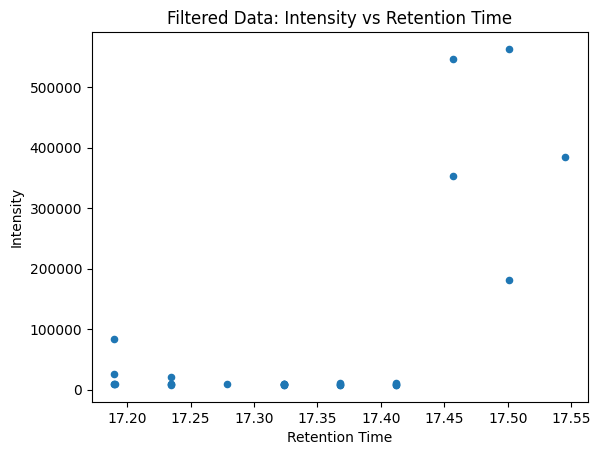

In [261]:
import matplotlib.pyplot as plt

# Plotting the Intensity vs Retention Time
matched_df.plot(x='Retention_Time', y='OzESI_Intensity', kind='scatter')

# Adding labels and title to the plot
plt.xlabel('Retention Time')
plt.ylabel('Intensity')
plt.title('Filtered Data: Intensity vs Retention Time')

# Displaying the plot
plt.show()


In [262]:
MRM_RT_df = matched_df